In [1]:
import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

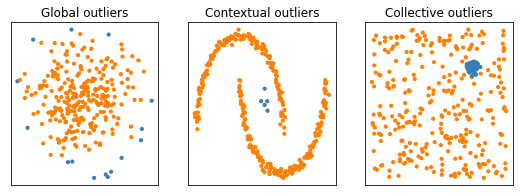

In [2]:
np.random.seed(0)

# Example settings
n_samples = 300
outliers_fraction = 0.05
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)

data1 = make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0]
detector = IsolationForest(contamination=outliers_fraction, random_state=42)
detector.fit(data1)
y1 = detector.predict(data1)

data2 = 4. * (make_moons(n_samples=n_samples, noise=.03, random_state=0)[0] - np.array([0.5, 0.25]))
noise = np.random.normal([0, 0], 0.3, size=[5,2])
data2 = np.concatenate([data2, noise])
y2 = np.ones(len(data2), dtype=np.int)
y2[-5:] = -1

data3 = np.random.uniform(-1, 1, size=(n_samples, 2))
noise = np.random.normal([0.5, 0.5], 0.04, size=[70, 2])
data3 = np.concatenate([data3, noise])
y3 = np.ones(len(data3), dtype=np.int)
y3[-70:] = -1

colors = np.array(['#377eb8', '#ff7f00'])

plt.figure(figsize=(3*3, 3))
plt.subplot(1, 3, 1)
plt.scatter(data1[:, 0], data1[:, 1], s=10, color=colors[(y1 + 1) // 2])
plt.xticks(())
plt.yticks(())
plt.title('Global outliers')

plt.subplot(1, 3, 2)
plt.scatter(data2[:, 0], data2[:, 1], s=10, color=colors[(y2 + 1) // 2])
plt.xticks(())
plt.yticks(())
plt.title('Contextual outliers')

plt.subplot(1, 3, 3)
plt.scatter(data3[:, 0], data3[:, 1], s=10, color=colors[(y3 + 1) // 2])
plt.xticks(())
plt.yticks(())
plt.title('Collective outliers')

plt.savefig('../imgs/outlier_examples.pdf', format='pdf', dpi=1200, bbox_inches='tight')

## Tutorial Question 2 - LOF

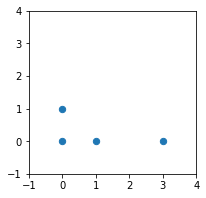

In [39]:
data = np.array([[0,0],[1,0],[0,1],[3,0]])

plt.figure(figsize=(3, 3))
plt.scatter(data[:, 0], data[:, 1], s=40)
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.savefig('../imgs/outlier_lof.pdf', format='pdf', dpi=1200, bbox_inches='tight')

In [40]:
from sklearn.neighbors import LocalOutlierFactor

In [41]:
clf = LocalOutlierFactor(n_neighbors=3, metric='manhattan',novelty=False)
pred = clf.fit_predict(data)
print(pred)
print(clf.negative_outlier_factor_)

[1 1 1 1]
[-1.04377104 -1.18148148 -0.90606061 -0.90606061]
